# The Packages

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
from sklearn.cluster import KMeans
import pickle

# Read Data

In [33]:
#Read our decision Matrix
data = pd.read_csv("Data/decisionMatrix.csv")
data.head(10)

,Node,DC,BC,CC,EC
0,0,0.085934,1.463059e-01,0.353343,3.391796e-05
1,1,0.004210,2.783274e-06,0.261376,6.045346e-07
2,2,0.002476,7.595021e-08,0.261258,2.233461e-07
3,3,0.004210,1.685066e-06,0.261376,6.635648e-07
4,4,0.002476,1.840332e-07,0.261258,2.236416e-07
5,5,0.003219,2.205964e-06,0.261308,1.183322e-06
6,6,0.001486,2.453776e-08,0.261190,2.170904e-07
7,7,0.004953,1.702985e-04,0.274769,2.568510e-05
8,8,0.001981,2.760498e-07,0.261224,2.197375e-07
9,9,0.014116,1.645424e-05,0.262055,2.214117e-06


In [34]:
#preparing the training data
trainingData = data[["DC","BC","CC","EC"]]
trainingData

,DC,BC,CC,EC
0,0.085934,1.463059e-01,0.353343,3.391796e-05
1,0.004210,2.783274e-06,0.261376,6.045346e-07
2,0.002476,7.595021e-08,0.261258,2.233461e-07
3,0.004210,1.685066e-06,0.261376,6.635648e-07
4,0.002476,1.840332e-07,0.261258,2.236416e-07
...,...,...,...,...
4034,0.000495,0.000000e+00,0.183989,2.951270e-10
4035,0.000248,0.000000e+00,0.183980,2.912901e-10
4036,0.000495,0.000000e+00,0.183989,2.931223e-10
4037,0.000991,7.156847e-08,0.184005,2.989233e-10


In [35]:
#read the top 10 influential nodes
influential = pd.read_csv("Data/rankedNodes.csv")
inf10 = influential.head(10)
inf10

,Node,DC,BC,CC,EC,Node.1,Topsis
0,107,0.258791,0.480518,0.459699,2.606940e-04,107,0.913277
1,1684,0.196137,0.337797,0.393606,7.164260e-06,1684,0.695566
2,1912,0.186974,0.229295,0.350947,9.540696e-02,1912,0.496063
3,3437,0.135463,0.236115,0.314413,9.531613e-08,3437,0.488865
4,0,0.085934,0.146306,0.353343,3.391796e-05,0,0.304321
5,1085,0.016345,0.149015,0.357852,3.164082e-06,1085,0.297379
6,698,0.016840,0.115330,0.271189,1.116876e-09,698,0.231106
7,567,0.015602,0.096310,0.328881,9.932295e-06,567,0.193646
8,58,0.002972,0.084360,0.397402,5.898120e-04,58,0.169464
9,428,0.028479,0.064309,0.394837,5.990065e-04,428,0.132923


In [36]:
top10_init = inf10[["DC","BC","CC","EC"]]
top10_init = top10_init.to_numpy()
top10_init

array([[2.58791481e-01, 4.80518079e-01, 4.59699454e-01, 2.60693991e-04],
       [1.96136701e-01, 3.37797450e-01, 3.93605615e-01, 7.16425979e-06],
       [1.86973749e-01, 2.29295340e-01, 3.50947332e-01, 9.54069615e-02],
       [1.35463101e-01, 2.36115357e-01, 3.14412520e-01, 9.53161293e-08],
       [8.59336305e-02, 1.46305921e-01, 3.53342667e-01, 3.39179617e-05],
       [1.63447251e-02, 1.49015092e-01, 3.57851826e-01, 3.16408207e-06],
       [1.68400198e-02, 1.15330450e-01, 2.71188717e-01, 1.11687629e-09],
       [1.56017831e-02, 9.63103312e-02, 3.28880925e-01, 9.93229483e-06],
       [2.97176820e-03, 8.43602059e-02, 3.97401831e-01, 5.89812015e-04],
       [2.84794453e-02, 6.43090624e-02, 3.94837196e-01, 5.99006469e-04]])

# KMeans Application

In [257]:
#initialize the parameters
k_clusters = 10
kmeans = KMeans(n_clusters = k_clusters, init = top10_init, max_iter = 20000, n_init = 1)

In [258]:
#start the trainning
label = kmeans.fit_predict(trainingData)

In [259]:
#convert to DataFrame
lab = pd.DataFrame(label, columns=['Cluster'])

In [260]:
community = pd.concat([data, lab], axis=1)
community.head(10)

,Node,DC,BC,CC,EC,Cluster
0,0,0.085934,1.463059e-01,0.353343,3.391796e-05,4
1,1,0.004210,2.783274e-06,0.261376,6.045346e-07,7
2,2,0.002476,7.595021e-08,0.261258,2.233461e-07,7
3,3,0.004210,1.685066e-06,0.261376,6.635648e-07,7
4,4,0.002476,1.840332e-07,0.261258,2.236416e-07,7
5,5,0.003219,2.205964e-06,0.261308,1.183322e-06,7
6,6,0.001486,2.453776e-08,0.261190,2.170904e-07,7
7,7,0.004953,1.702985e-04,0.274769,2.568510e-05,7
8,8,0.001981,2.760498e-07,0.261224,2.197375e-07,7
9,9,0.014116,1.645424e-05,0.262055,2.214117e-06,7


In [282]:
nodesByTopsis = pd.read_csv("Data/nodesByTopsis.csv")
nodesByTopsis = pd.concat([nodesByTopsis,community['Cluster']], axis=1)
top10Clusters = nodesByTopsis.sort_values('Topsis',ascending=False).head(10)
top10Clusters

,Node,Topsis,Cluster
107,107,0.913277,0
351,1684,0.695566,1
352,1912,0.496063,2
1821,3437,0.488865,3
0,0,0.304321,4
571,1085,0.297379,4
1843,698,0.231106,4
1710,567,0.193646,4
58,58,0.169464,5
350,428,0.132923,5


In [284]:
gk = community.groupby('Cluster')
gk.first()

,Node,DC,BC,CC,EC
Cluster,,,,,
0,107,0.258791,0.480518,0.459699,2.606940e-04
1,1684,0.196137,0.337797,0.393606,7.164260e-06
2,1912,0.186974,0.229295,0.350947,9.540696e-02
3,3437,0.135463,0.236115,0.314413,9.531613e-08
4,0,0.085934,0.146306,0.353343,3.391796e-05
5,58,0.002972,0.084360,0.397402,5.898120e-04
6,3980,0.014611,0.024820,0.225448,4.722356e-08
7,1,0.004210,0.000003,0.261376,6.045346e-07
8,136,0.032937,0.026870,0.294186,3.894375e-03


In [270]:
#Group all Nodes of communities in lists
comm = []
for i in range(10):
    comm.append(gk.get_group(i)['Node'].tolist())
comm

[[107],
 [1684],
 [1912],
 [3437],
 [0, 1085, 567, 698],
 [58,
  171,
  348,
  414,
  428,
  353,
  376,
  420,
  475,
  483,
  484,
  563,
  566,
  580,
  651,
  1136,
  1165,
  1171,
  1465,
  1534,
  1577,
  1666,
  1687,
  1718],
 [3980,
  3989,
  4011,
  4031,
  686,
  687,
  688,
  689,
  690,
  691,
  692,
  693,
  694,
  695,
  696,
  697,
  699,
  700,
  701,
  702,
  703,
  704,
  705,
  706,
  707,
  708,
  709,
  710,
  711,
  712,
  713,
  714,
  715,
  716,
  717,
  718,
  719,
  720,
  721,
  722,
  723,
  724,
  725,
  726,
  727,
  728,
  729,
  730,
  731,
  732,
  733,
  734,
  735,
  736,
  737,
  738,
  739,
  740,
  741,
  742,
  743,
  744,
  745,
  746,
  747,
  748,
  749,
  750,
  751,
  752,
  753,
  754,
  755,
  756,
  757,
  758,
  759,
  760,
  761,
  762,
  763,
  764,
  765,
  766,
  767,
  768,
  769,
  770,
  771,
  772,
  773,
  774,
  775,
  776,
  777,
  778,
  779,
  780,
  781,
  782,
  783,
  784,
  785,
  786,
  787,
  788,
  789,
  790,
  791,

In [287]:
for i in range(10):
    print('Cluster[',i,'] = ',comm[i])

Cluster[ 0 ] =  [107]
Cluster[ 1 ] =  [1684]
Cluster[ 2 ] =  [1912]
Cluster[ 3 ] =  [3437]
Cluster[ 4 ] =  [0, 1085, 567, 698]
Cluster[ 5 ] =  [58, 171, 348, 414, 428, 353, 376, 420, 475, 483, 484, 563, 566, 580, 651, 1136, 1165, 1171, 1465, 1534, 1577, 1666, 1687, 1718]
Cluster[ 6 ] =  [3980, 3989, 4011, 4031, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 699, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 713, 714, 715, 716, 717, 718, 719, 720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744, 745, 746, 747, 748, 749, 750, 751, 752, 753, 754, 755, 756, 757, 758, 759, 760, 761, 762, 763, 764, 765, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796, 797, 798, 799, 800, 801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 82

In [263]:
size=[]
for i in range(10):
    sslist=[]
    for j in comm[i]:
        list1=[107,1684,1912,3437,0,1085,698,567,58,428]
        if j in list1:
            sslist.append(1000)
        else:
            sslist.append(35)
    size.append(sslist)
size

[[1000],
 [1000],
 [1000],
 [1000],
 [1000, 1000, 1000, 1000],
 [1000,
  35,
  35,
  35,
  1000,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35],
 [35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  35,
  

# Visualization

<function matplotlib.pyplot.show(close=None, block=None)>

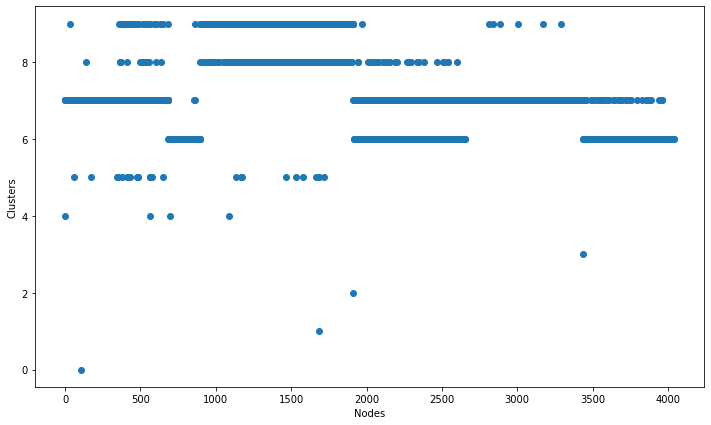

In [264]:
#Visualize Nodes by Clusters
plt.scatter(community['Node'], community['Cluster'])
plt.ylabel("Clusters")
plt.xlabel("Nodes")
plt.show

In [253]:
#Visualize cummunities in Netwoek graph
Graph = nx.read_edgelist('facebookNet.txt',create_using=nx.Graph(),nodetype=int)

In [134]:
plt.rcParams.update({'figure.figsize': (12, 7)})

In [135]:
with open('networkShape.pkl', 'rb') as f:
    sp1 = pickle.load(f)

In [265]:
keyList = inf10.head(10).Node.tolist()
myDict = {key: key for key in keyList}

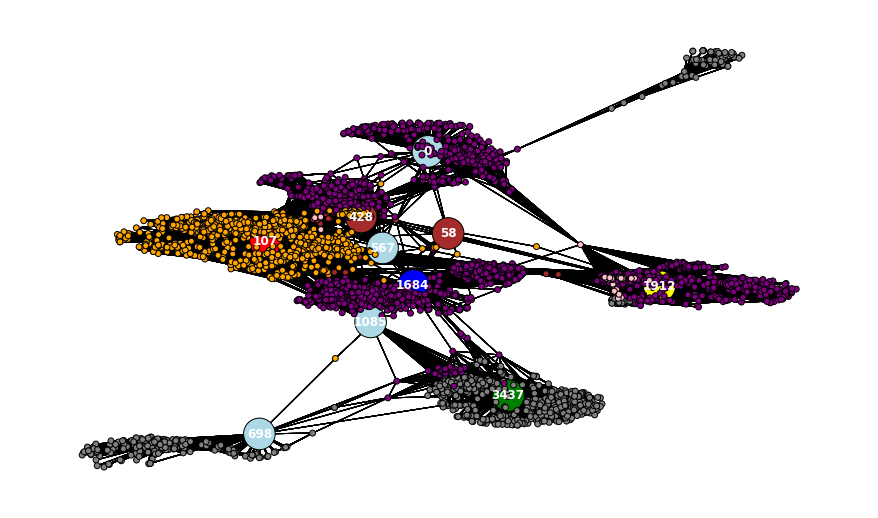

In [266]:
colors=['red','blue','yellow','green','lightblue','brown','grey','purple','pink','orange']
for i in range(10):
    nx.draw(Graph, pos=sp1, nodelist=comm[i], node_color= colors[i],node_size=size[i], edgecolors='black')

labels=nx.draw_networkx_labels(Graph, pos = sp1, labels=myDict, font_color='w', font_weight='bold')

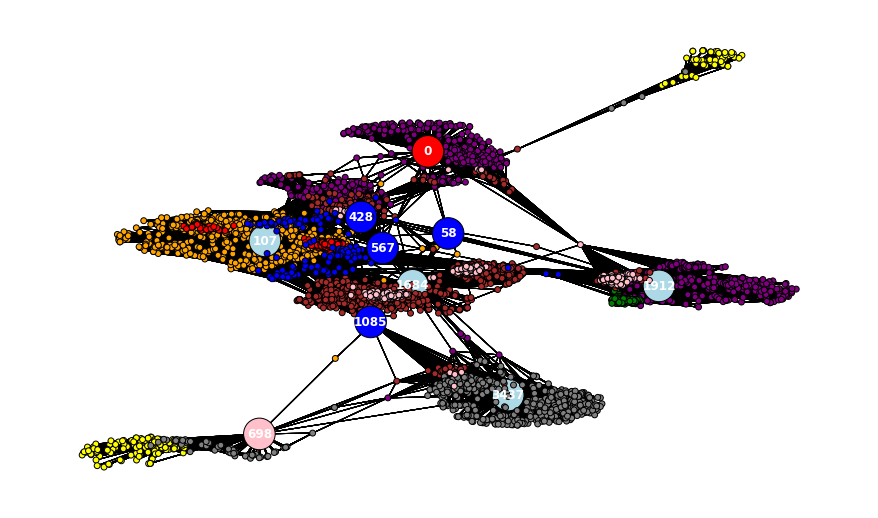

In [256]:
#without init
colors=['purple','orange','yellow','green','lightblue','brown','grey','red','pink','blue']
for i in range(10):
    nx.draw(Graph, pos=sp1, nodelist=comm[i], node_color= colors[i],node_size=size[i], edgecolors='black')

labels=nx.draw_networkx_labels(Graph, pos = sp1, labels=myDict, font_color='w', font_weight='bold')